## Second Order Linear ODE

# Simple Harmonic Oscillator

Another classical example is the harmonic oscillator, given by


\begin{align*}
\ddot{x} + \omega^2 x = 0
\end{align*}

with the known analytical solution


\begin{align*}
x(t) &= A\cos(\omega t - \phi) \\
v(t) &= -A\omega\sin(\omega t - \phi),
\end{align*}

where

\begin{align*}
A = \sqrt{c_1 + c_2} \qquad\text{and}\qquad \tan \phi = \frac{c_2}{c_1}
\end{align*}


with c1,c2 constants determined by the initial conditions such that c1 is the initial position and ωc2 is the initial velocity.

Instead of transforming this to a system of ODEs to solve with ODEProblem, we can use SecondOrderODEProblem as follows.

In [1]:
# Simple Harmonic Oscillator Problem
using OrdinaryDiffEq, Plots

In [2]:
#Parameters
ω = 1

1

In [3]:
#Initial Conditions
x₀ = [0.0]
dx₀ = [π/2]
tspan = (0.0, 2π)

(0.0, 6.283185307179586)

In [4]:
ϕ = atan((dx₀[1]/ω)/x₀[1])
A = √(x₀[1]^2 + dx₀[1]^2)

1.5707963267948966

In [5]:
#Define the problem
function harmonicoscillator(ddu,du,u,ω,t)
    ddu .= -ω^2 * u
end

harmonicoscillator (generic function with 1 method)

In [6]:
#Pass to solvers
prob = SecondOrderODEProblem(harmonicoscillator, dx₀, x₀, tspan, ω)
sol = solve(prob, DPRKN6())

retcode: Success
Interpolation: 3rd order Hermite
t: 18-element Array{Float64,1}:
 0.0
 4.0476920236762687e-7
 4.452461226043895e-6
 4.4929381462806576e-5
 0.0004496985838304334
 0.004497390607506702
 0.04497431084426938
 0.37064676671260066
 0.7449870869566273
 1.2372376737949364
 1.7869729201559457
 2.5975370942861353
 3.1274737773164847
 3.7551744269343494
 4.310133084972558
 5.071034099705734
 5.933007209040742
 6.283185307179586
u: 18-element Array{RecursiveArrayTools.ArrayPartition{Float64,Tuple{Array{Float64,1},Array{Float64,1}}},1}:
 [1.5707963267948966][0.0]
 [1.5707963267947678][6.358099762787511e-7]
 [1.5707963267793263][6.9939097390433435e-6]
 [1.570796325209453][7.057490734319895e-5]
 [1.5707961679647582][0.0007063848598371488]
 [1.5707804409482249][0.0070644608314648]
 [1.5692079786100197][0.07062166904708621]
 [1.4641286838976852][0.5689712761025696]
 [1.1546871244725188][1.0649407694171866]
 [0.5142906735099458][1.4842192784387382]
 [-0.3369307298254776][1.5342358709610

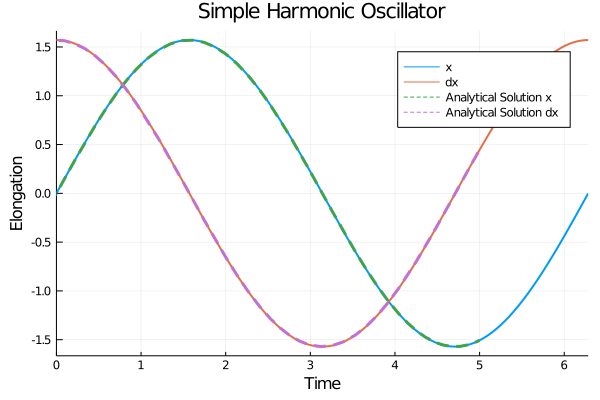

In [7]:
#Plot
plot(sol, vars=[2,1], linewidth=2, title ="Simple Harmonic Oscillator", xaxis = "Time", yaxis = "Elongation", label = ["x" "dx"])
plot!(t->A*cos(ω*t-ϕ), lw=3, ls=:dash, label="Analytical Solution x")
plot!(t->-A*ω*sin(ω*t-ϕ), lw=3, ls=:dash, label="Analytical Solution dx")


Note that the order of the variables (and initial conditions) is dx, x. Thus, if we want the first series to be x, we have to flip the order with `vars=[2,1]`.